# **Indian Foods Clssification**

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from keras.applications.xception import Xception

from keras.callbacks import EarlyStopping,ModelCheckpoint

###  **Reading and Augmenting Data**

In [ ]:
traingen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

valgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)

In [ ]:
train_data = traingen.flow_from_directory("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/dataset1/train",
                                         target_size=(299,299),
                                          seed = 123,
                                          batch_size=32,
                                          class_mode = "categorical"
                                         )
val_data = valgen.flow_from_directory("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/dataset1/val",
                                     target_size=(299,299),
                                      seed = 123,
                                      batch_size=32,
                                      class_mode = "categorical"
                                     )

test_data = testgen.flow_from_directory("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/dataset1/test",
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )

Found 3996 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.
Found 585 images belonging to 20 classes.


**Getting the calass names**

In [ ]:
cl = train_data.class_indices
classes = list(cl.keys())
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

**Distribution of classes**

In [ ]:
cl_fq = train_data.classes

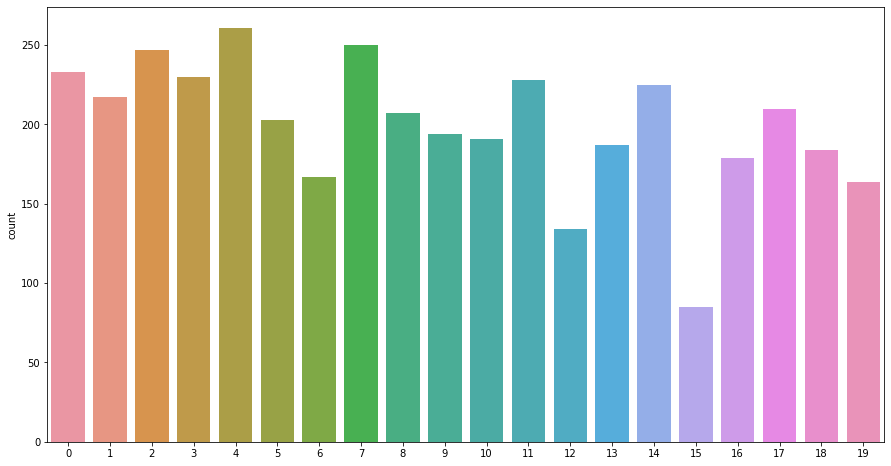

In [ ]:
plt.figure(figsize=[15,8])
sns.countplot(x =cl_fq);

**Taking a look at some Images**

In [ ]:
# one Batch
x,y = next(train_data)
x.shape

(32, 299, 299, 3)

In [ ]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

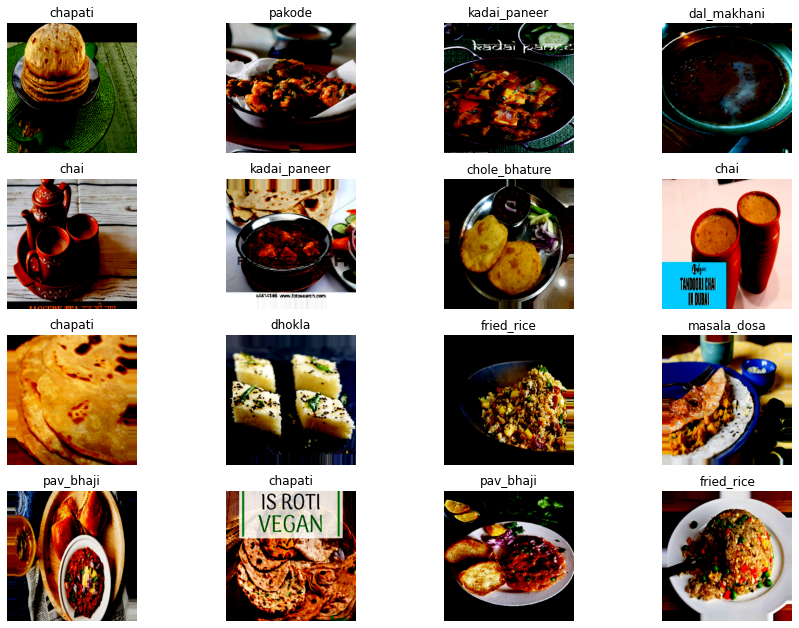

In [ ]:
plotImages(x,y)

## **Model Building**

In [ ]:
base_model = Xception(include_top=False,
                              weights="imagenet",
                              input_shape=(299,299,3),
                        )
base_model.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
# Transfer to main model
image_input = Input(shape=(299,299,3))

x = base_model(image_input,training = False)

x = GlobalAveragePooling2D()(x)

x = Dense(128,activation = "relu")(x)

image_output = Dense(20,activation="softmax")(x)

model = Model(image_input,image_output)

**Compile**

In [ ]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

**Callbacks**

In [ ]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model.h5",verbose= 1 ,save_best_only=True)]

**Train**

In [ ]:
hist = model.fit(train_data,epochs=10,validation_data=val_data,callbacks=my_calls)

Epoch 1/10
113/125 [==========================>...] - ETA: 4:01 - loss: 1.1247 - accuracy: 0.7151

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


116/125 [==========================>...] - ETA: 3:00 - loss: 1.1133 - accuracy: 0.7176

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


125/125 [==============================] - ETA: 0s - loss: 1.0747 - accuracy: 0.7252 
Epoch 1: val_loss improved from inf to 0.58607, saving model to Model.h5
125/125 [==============================] - 3355s 27s/step - loss: 1.0747 - accuracy: 0.7252 - val_loss: 0.5861 - val_accuracy: 0.8256
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.4247 - accuracy: 0.8759
Epoch 2: val_loss improved from 0.58607 to 0.48619, saving model to Model.h5
125/125 [==============================] - 222s 2s/step - loss: 0.4247 - accuracy: 0.8759 - val_loss: 0.4862 - val_accuracy: 0.8704
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.2988 - accuracy: 0.9102
Epoch 3: val_loss improved from 0.48619 to 0.43157, saving model to Model.h5
125/125 [==============================] - 223s 2s/step - loss: 0.2988 - accuracy: 0.9102 - val_loss: 0.4316 - val_accuracy: 0.8720
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.2440 - accuracy: 0.9299
E

**Test**

19/19 [==============================] - 363s 20s/step - loss: 0.7239 - accuracy: 0.8205


[0.7239407896995544, 0.8205128312110901]

**Accuracy and loss**

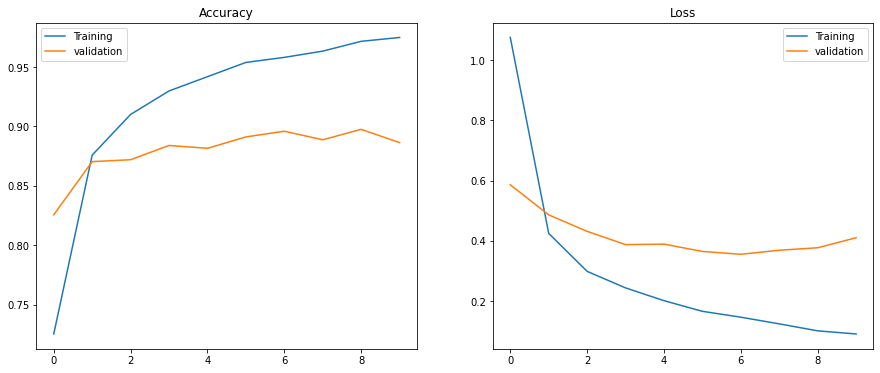

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Saved model**

In [ ]:
saved_model = load_model("./Model3.h5")

**Making Predictions**

In [ ]:
pred = saved_model.predict(test_data)

In [ ]:
pred = [np.argmax(i) for i in pred]
y_test = test_data.classes

In [ ]:
print(classification_report(pred,y_test))

In [ ]:
plt.figure(figsize=[20,12])
sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt="d",cmap="viridis");
plt.xlabel('Predicted values')
plt.ylabel('True Values')

In [ ]:
classes=['burger','butter_naan','chai','chapati','chole_bhature','dal_makhani','dhokla','fried_rice','idli','jalebi','kaathi_rolls','kadai_paneer',
 'kulfi','masala_dosa','momos','paani_puri','pakode','pav_bhaji','pizza','samosa']

In [ ]:
img='/content/drive/MyDrive/Final-year-project/cnn_food_prediction/dataset1/val/burger/007.jpg'
saved_model = load_model("./Model.h5")
testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)
test_data = testgen.flow_from_directory('/content/drive/MyDrive/Final-year-project/cnn_food_prediction/usave/',
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )
pred = saved_model.predict(test_data,verbose=1)
pred = [np.argmax(i) for i in pred]
a=pred[0]
classes[a]

**sTREAMLIT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

In [ ]:
!ngrok authtoken 2CKv3Oatwxz7JWkmH3A6Fi2ItdZ_7VHqwQp5bRWM8YtN7bSeE

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image



img = Image.open("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/D.jpg")
st.image(img)
from numpy import asarray
from PIL import Image

upload = st.file_uploader('Upload')
weight=st.number_input('Enter the food volume in grams//ml')

# Input for bmi

weight = st.number_input("Enter your Weight in KG", step = 0.1)

height = st.number_input("Enter your Height in Meters")

def save_uploaded_file(uploadedfile):
  with open(os.path.join("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/usave/saves",uploadedfile.name),"wb") as f:
     f.write(uploadedfile.getbuffer())
  return None

def run_this():
  import glob
  removing_files = glob.glob('/content/drive/MyDrive/Final-year-project/cnn_food_prediction/usave/saves/*.jpg')
  for i in removing_files:
    os.remove(i)
  return None
   

if upload is not None:
  st.image(upload)
  saved_model = load_model("/content/drive/MyDrive/Final-year-project/cnn_food_prediction/Model.h5")
  
  save_uploaded_file(upload)
   
  if(st.button('Enter')):
      testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)
      test_data = testgen.flow_from_directory('/content/drive/MyDrive/Final-year-project/cnn_food_prediction/usave/',
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )
      pred = saved_model.predict(test_data,verbose=1)
      pred = [np.argmax(i) for i in pred]
      # st.write(pred[0])
      classes=['burger','butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kaathi_rolls',
      'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa']
      a=pred[0]
      res=classes[a]

      st.success(f"The given image is:{res}")

      df_cal=pd.read_excel('/content/drive/MyDrive/Final-year-project/cnn_food_prediction/calorielist.xlsx')
      for i in range(len(df_cal.fname)):
        df_cal.fname[i]=df_cal.fname[i].lower()

      for i in range(len(df_cal.fname)):
        if(df_cal.fname[i]==res):
          calpergrm=df_cal.calpergram[i]
          total_cal=weight*calpergrm
          st.success(f"Calorie :{total_cal}")

      bmi = weight/(height)**2
      st.subheader("BMI Calculator")

      st.text("""BMI is a person’s weight in kilograms divided by the square of height in meters. 
        A high BMI can indicate high body fatness.
        If your BMI is less than 18.5, it falls within the underweight range.
        If your BMI is 18.5 to <25, it falls within the healthy weight range.
        If your BMI is 25.0 to <30, it falls within the overweight range.
        If your BMI is 30.0 or higher, it falls within the obesity range.
        Obesity is frequently subdivided into categories:
        Class 1: BMI of 30 to < 35
        Class 2: BMI of 35 to < 40
        Class 3: BMI of 40 or higher. 
        Class 3 obesity is sometimes categorized as “severe” obesity.
        """)  
      st.success(f"Your BMI is {bmi}")


      if(bmi<25):
        if(total_cal>600):
          st.success("Calorie intake is high and unhealthy for the meal according to your BMI")
        else:
          st.success("Calorie intake for the meal is low  according to your BMI")

      elif (bmi>25):
        if(total_cal>450):
          st.success("Calorie intake is High and unhelathy for the meal according to your BMI")
        else:
          st.success("Calorie intake is low and  for the meal according to your BMI")
      else:
        st.success("Calorie intake is helathy for the meal according to your BMI")

run_this()

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://23d4-35-186-146-151.ngrok.io


In [ ]:
#  !killall ngrok